Imagine que você quer adivinhar se um filme será um sucesso de bilheteria.

Uma Árvore de Decisão (o modelo mais simples) é como perguntar a uma única pessoa (um especialista) sua opinião. Essa pessoa pode ser muito boa, mas sua opinião pode ter alguns "vícios" ou se basear em informações muito específicas. Se essa pessoa estiver errada, a sua previsão final estará errada.

Uma Floresta Aleatória (Random Forest) é como perguntar a um grupo de 100 especialistas (as árvores da floresta) e depois fazer uma votação para ver qual é a opinião da maioria. Cada um desses 100 especialistas foi treinado de uma maneira ligeiramente diferente, com dados aleatórios, para garantir que eles não cheguem à mesma conclusão pelos mesmos motivos.

A ideia principal é que a "sabedoria da multidão" é quase sempre melhor do que a opinião de um único especialista. O Random Forest é um modelo de aprendizado de máquina que usa essa mesma lógica.

Neste script, vamos criar um problema simples e ver como um único especialista (uma árvore) e um painel de especialistas (uma floresta) tomam decisões.

Passo 1: Visualizando nosso problema. Temos dois grupos de pontos...


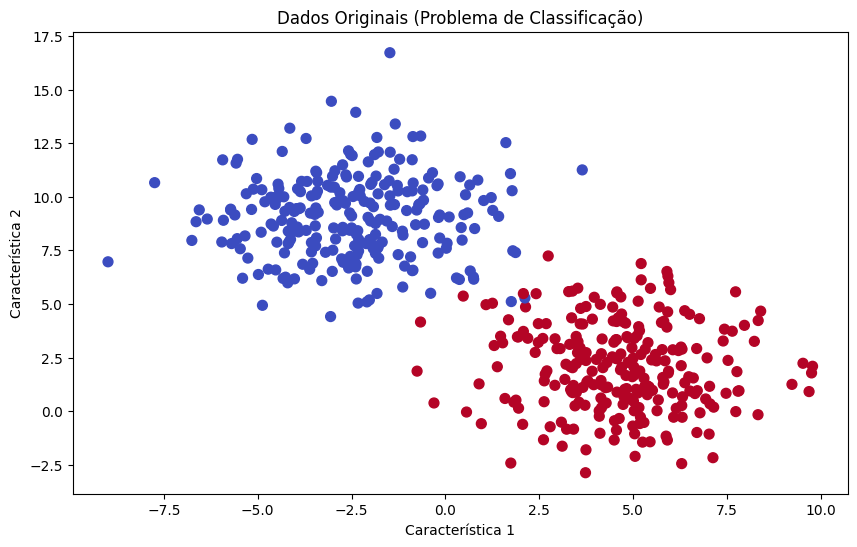


Passo 2: Treinando uma única Árvore de Decisão...


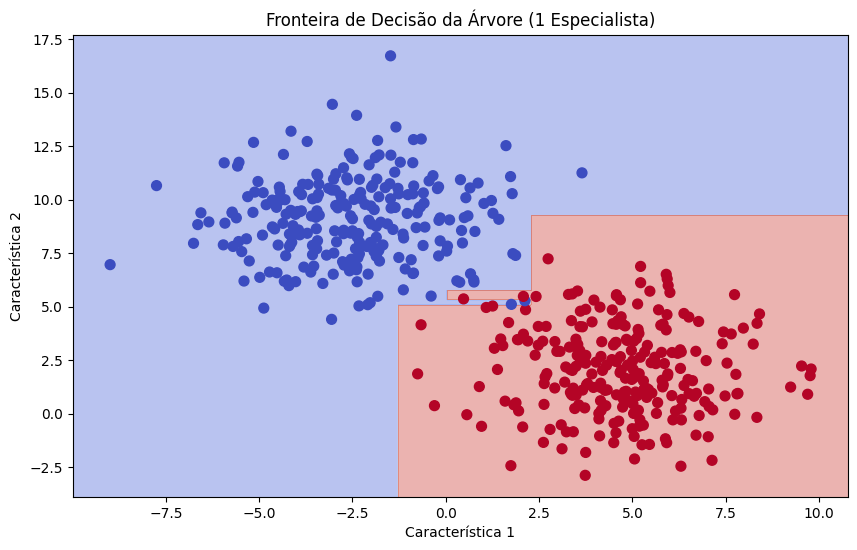


Note que a fronteira de decisão é 'quadriculada' e tenta se encaixar perfeitamente em alguns pontos específicos, o que pode ser um sinal de que ela está muito 'viciada' nos dados de treino.

Passo 3: Treinando uma Floresta Aleatória com 100 árvores...


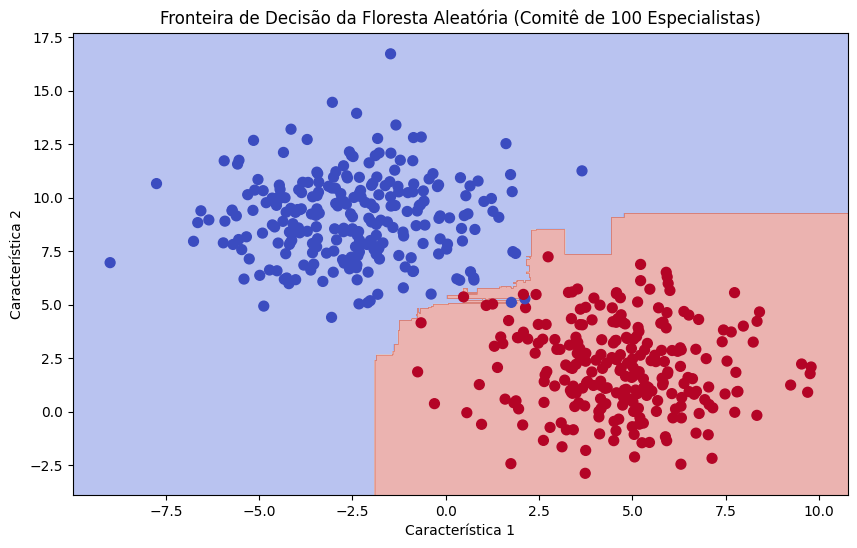


Olha a diferença! A fronteira de decisão da Floresta Aleatória é muito mais suave e generalista. Ela é o resultado do 'voto' de todas as 100 árvores, e por isso comete menos erros bobos e faz uma previsão mais confiável para novos dados.


In [2]:
# =================================================================
# 1. Configuração e Criação do Conjunto de Dados
# =================================================================

# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Importando as classes do scikit-learn para Árvore de Decisão e Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Definindo um "nível de aleatoriedade" para que os resultados sejam sempre os mesmos
np.random.seed(42)

# Criando um conjunto de dados simples para visualização
# Ele terá 2 classes (cores diferentes) e 2 características (eixos X e Y)
X, y = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=2.0)

# =================================================================
# 2. Visualização dos Dados Originais
# =================================================================

print("Passo 1: Visualizando nosso problema. Temos dois grupos de pontos...")

# Plotando os dados para ver como eles se parecem
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.title('Dados Originais (Problema de Classificação)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# =================================================================
# 3. Treinando uma Única Árvore de Decisão (Um "Especialista")
# =================================================================

print("\nPasso 2: Treinando uma única Árvore de Decisão...")

# Criando e treinando uma única árvore de decisão
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X, y)

# Função para plotar a fronteira de decisão (o 'caminho' que o modelo usa para decidir)
def plot_decision_boundary(clf, X, y, title):
    # Criando uma grade para avaliar as previsões do modelo
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotando a fronteira de decisão e os pontos originais
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

# Plotando a fronteira de decisão da Árvore de Decisão
plot_decision_boundary(clf_tree, X, y, 'Fronteira de Decisão da Árvore (1 Especialista)')
print("\nNote que a fronteira de decisão é 'quadriculada' e tenta se encaixar perfeitamente em alguns pontos específicos, o que pode ser um sinal de que ela está muito 'viciada' nos dados de treino.")

# =================================================================
# 4. Treinando uma Floresta Aleatória (O "Comitê de Especialistas")
# =================================================================

print("\nPasso 3: Treinando uma Floresta Aleatória com 100 árvores...")

# Criando e treinando a Floresta Aleatória
# n_estimators=100 significa que estamos criando 100 árvores de decisão
clf_forest = RandomForestClassifier(n_estimators=100, random_state=42)
clf_forest.fit(X, y)

# Plotando a fronteira de decisão da Floresta Aleatória
plot_decision_boundary(clf_forest, X, y, 'Fronteira de Decisão da Floresta Aleatória (Comitê de 100 Especialistas)')

print("\nOlha a diferença! A fronteira de decisão da Floresta Aleatória é muito mais suave e generalista. Ela é o resultado do 'voto' de todas as 100 árvores, e por isso comete menos erros bobos e faz uma previsão mais confiável para novos dados.")